# <font color='black'>Machine Learning - Dados Doença Hepática</font><br></br>
![title](imagens/Hepatica.webp)
<br></br>
<font size="3" color = "#708090">
    <b>Neste mini-projeto mostro o processo para construir um modelo de Machine Learning capaz de prever se um paciente vai ou não desenvolver uma doença hepática com base em diversas características do  paciente.  Esse  modelo  pode  ajudar  médicos,  hospitais  ou  governos  a  planejar  melhor  o orçamento de gastos de saúde ou mesmo criar políticas de prevenção.<br></br>
        O objetivo   é   prever   uma   classe   (sim   ou   não),   usarei aprendizado supervisionado para   classificação,   criando   diferentes   versões   do   modelo   com   diferentes algoritmos. Cobrindo todo o processo de Machine Learning de ponta a ponta.Será utilizada como fonte de dados o dataset disponível no link abaixo:</font><br></br>
https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

<B>Algoritmos Testados:</B>
1) Random Forest
2) KNN
3) Decision Tree
4) SVM

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.6


In [2]:
# Imports
import joblib # SALVAR EM DISCO
import pickle # SALVAR EM DISCO
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn # FRAMEWORKING PARA MACHINE LEARNING
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV # ALGORITMO
from sklearn.linear_model import LogisticRegression # ALGORITMO
from sklearn.ensemble import RandomForestClassifier # ALGORITMO
from sklearn.neighbors import KNeighborsClassifier# ALGORITMO
from sklearn.tree import DecisionTreeClassifier # ALGORITMO
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Flávio Medeiros" --iversions

Author: Flávio Medeiros

joblib    : 1.2.0
numpy     : 1.23.4
seaborn   : 0.12.1
sklearn   : 0.0
matplotlib: 3.6.0
pandas    : 1.5.1



## Carregando o Conjunto de dados

In [4]:
# Carrega os dados
dados = pd.read_csv('dados/dataset.csv')

In [5]:
# Shape
dados.shape

(583, 11)

In [6]:
# Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
# Amostra dos dados
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
304,55,Female,0.8,0.2,155,21,17,6.9,3.8,1.4,1
332,26,Male,7.1,3.3,258,80,113,6.2,2.9,0.8,1
371,33,Male,0.8,0.2,135,30,29,7.2,4.4,1.5,2
318,38,Male,3.7,2.2,216,179,232,7.8,4.5,1.3,1
399,27,Male,1.0,0.2,205,137,145,6.0,3.0,1.0,1
189,48,Female,0.8,0.2,218,32,28,5.2,2.5,0.9,2
330,26,Male,2.0,0.9,157,54,68,6.1,2.7,0.8,1
448,48,Female,0.8,0.2,142,26,25,6.0,2.6,0.7,1
522,46,Female,0.8,0.2,185,24,15,7.9,3.7,0.8,1
425,58,Male,0.4,0.1,100,59,126,4.3,2.5,1.4,1


## Análise Exploratória de Dados

In [8]:
# Tipos de dados
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [9]:
# Variáveis categóricas - FILTRANDO AS COLUNAS COM TIPO=object
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [10]:
# Variáveis não categóricas - FILTRANDO AS COLUNAS COM TIPO DIFERENTE DE: object
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploração das Variáveis Numéricas

In [11]:
dados.describe() # A "GENDER" NÃO É LISTADA, POIS, É UMA VARIÁVEL CATEGÓRICA.

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


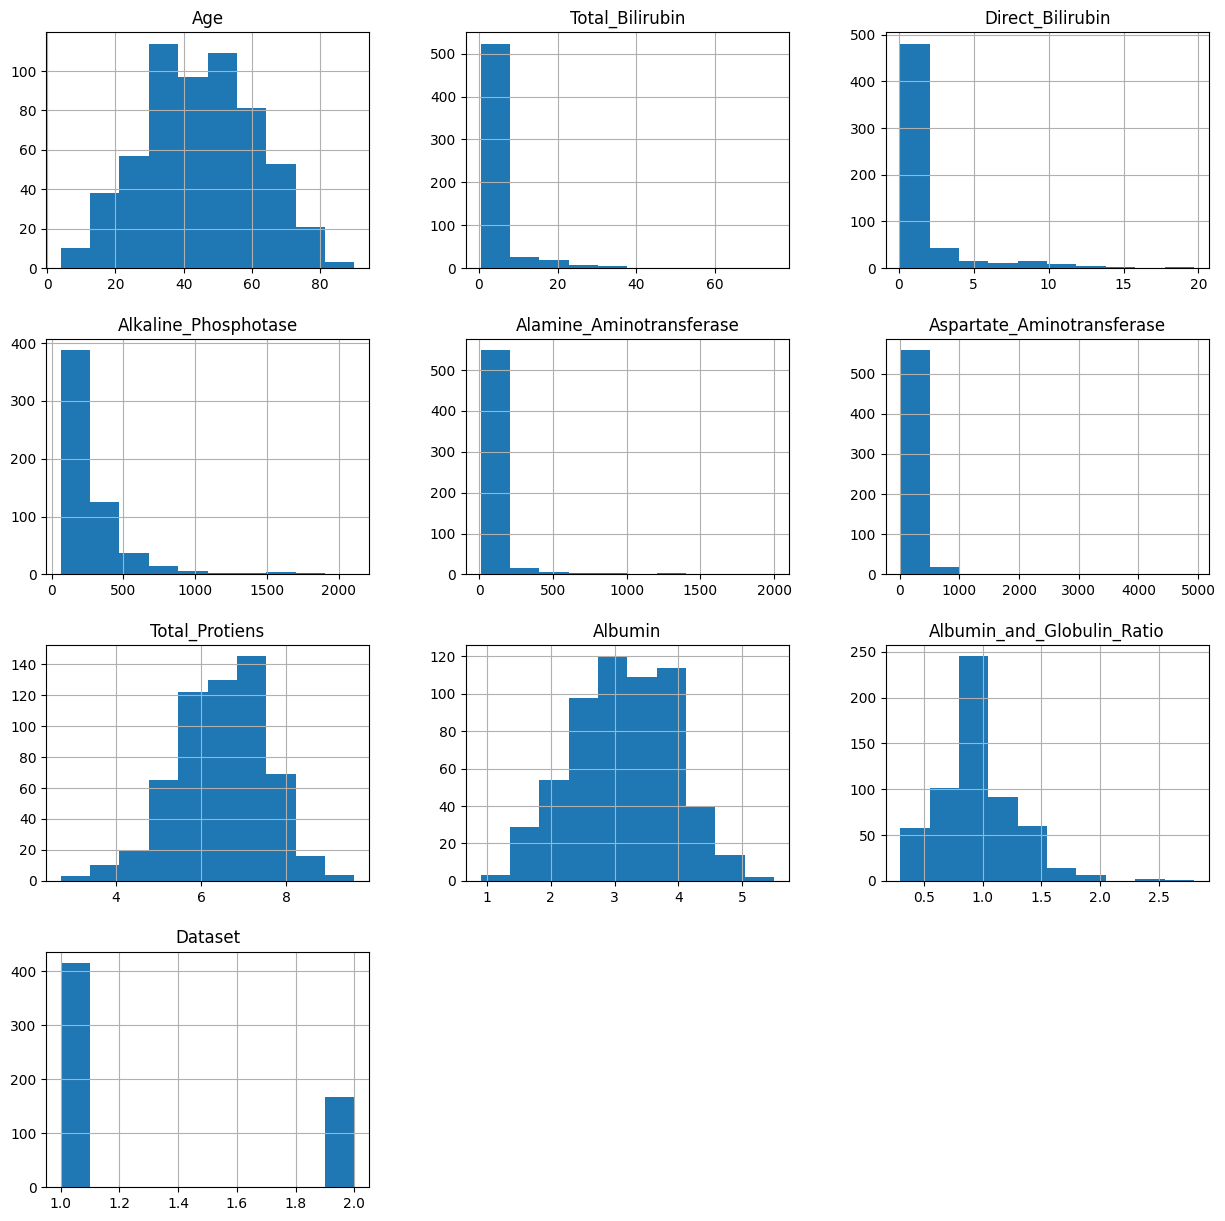

In [12]:
# Plot 
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

# SOMENTE A VARIÁVEL AGE, PARECE TEM UMA DISTRIBUIÇÃO NORMAL
# VEJA O GRÁFICO E A TABELA ACIMA... PERCEBA NA TABELA OS VALORES: MÉDIA E MAX. PODE SER POSSÍVEL OUTLIERS

Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.

A coluna dataset (variável target) tem '1' para doença hepática e '2' para nenhuma doença hepática. Será ajustada a variável colocando valores mais fáceis de interpretar. A classe negativa (não tem a doença) será zero.

In [13]:
# Função para ajustar a variável target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [14]:
# Aplica a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [15]:
# RENOMEANDO ACOLUNA
# AQUI: inplace = True, SIGNIFICA QUE VAI GRAVAR A ALTERAÇÃO NO PRÓPRIO DATAFRAME E NÃO NA MEMÓRIA
dados.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [16]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
435,17,Female,0.5,0.1,206,28,21,7.1,4.5,1.7,0
553,46,Male,10.2,4.2,232,58,140,7.0,2.7,0.6,1
366,16,Male,0.7,0.2,418,28,35,7.2,4.1,1.3,0
147,65,Male,0.7,0.1,392,20,30,5.3,2.8,1.1,1
237,35,Female,0.9,0.3,158,20,16,8.0,4.0,1.0,1


In [17]:
# Correlação entre as variáveis
dados.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


### Exploração da Variável Categórica

In [18]:
dados.describe(include = ['object']) # EXIBEI A CONTAGEM DE FREQUÊNCIA

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo masculino:  441
Número de pacientes do sexo feminino:  142


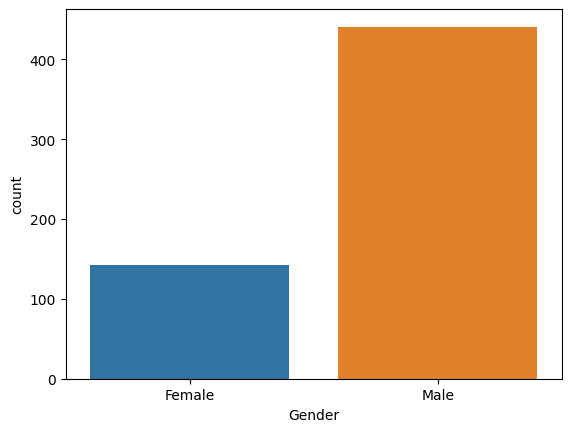

In [19]:
# Plot
sns.countplot(data = dados, x = 'Gender', label = 'Count')

# Value counts
M, F = dados['Gender'].value_counts()

# Print
print('Número de pacientes do sexo masculino: ', M)
print('Número de pacientes do sexo feminino: ', F)

Transformar a variável categórica em sua representação numérica usando label encoding. Além de reduzir o trabalho mais tarde, facilitará a criação de gráficos a seguir.

In [20]:
# Função para label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [21]:
# Aplica a função
dados['Gender'] = dados['Gender'].map(encoding_func)

In [22]:
dados.sample(5) # TODAS AS VARÁVEIS ESTÃO COM REPRESENTAÇÃO NUMÉRICA

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
521,55,0,4.4,2.9,230,14,25,7.1,2.1,0.4,1
471,49,1,0.6,0.1,185,17,26,6.6,2.9,0.7,0
30,57,0,4.0,1.9,190,45,111,5.2,1.5,0.4,1
204,21,0,0.7,0.2,135,27,26,6.4,3.3,1.0,0
175,31,0,0.8,0.2,198,43,31,7.3,4.0,1.2,1


### Verificando a Relação Entre Atributos

In [23]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


 As variáveis: Total_Bilirubin e Direct_Bilirubin, tem uma forte correlação. Com isso, irei nalisar essa correlação.

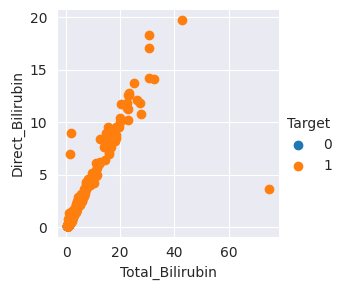

In [24]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Target').map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()
# hue é a cor

No gráfico acima fica evidente a forte relação. Com isso, uma delas pode ser removida do modelo.

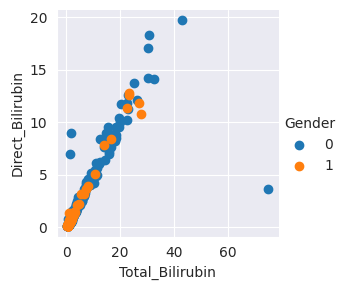

In [25]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid

sns.FacetGrid(dados, hue = 'Gender').map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()
# hue é a cor

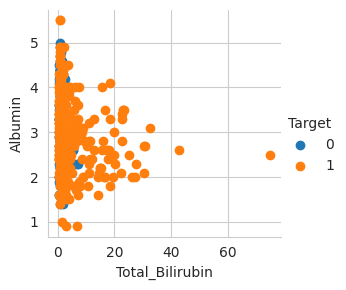

In [26]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Target').map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

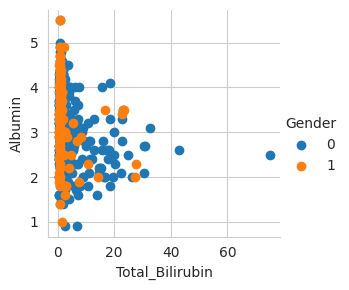

In [27]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender').map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

### Verificando Valores Ausentes e Registros Duplicados

In [28]:
# Verificando valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [29]:
# Verificando registros duplicados (complete cases)
# Complete cases: duas linhas com as colunas identicas
# Para cada par de linhas duplicadas, uma será removida.
dados[dados.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Limpeza de Dados

### Tratamento de Registros Duplicados

In [30]:
dados.shape

(583, 11)

In [31]:
# Removendo registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
print(dados.shape)

(570, 11)


### Tratamento de Outliers

In [32]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<AxesSubplot: >

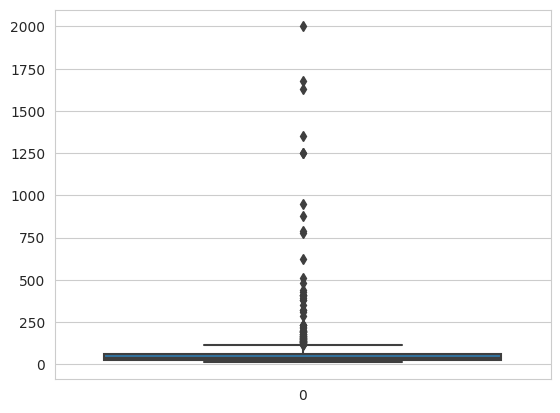

In [33]:
# Boxplot - De acordo com a tabela acima a variável abaixo parece ser um outilier
sns.boxplot(dados.Alamine_Aminotransferase)

<b>Será que os valores extremos são mesmo outliers?</b>

In [34]:
# Contagem de frequência por valor
dados.Alamine_Aminotransferase.sort_values(ascending = False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

<b>Não parece ser outliers, pois são muito pacientes para o mesmo valor</b>

<AxesSubplot: >

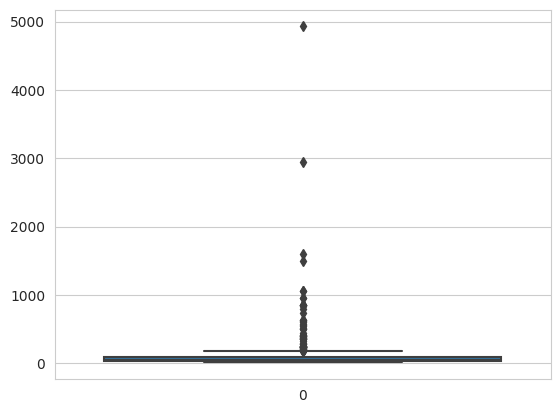

In [35]:
# Boxplot - De acordo com a tabela acima essa variável parece ser um outlier.
sns.boxplot(dados.Aspartate_Aminotransferase)

In [36]:
# Contagem de frequência por valor - De acordo com a tabela acima essa variável parece ser um outlier.
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [37]:
# DECISÃO (remover os valores extremos): Manter somente os registros onde o valor for menor ou igual a 3000
dados = dados[dados.Aspartate_Aminotransferase <= 3000]
dados.shape

(569, 11)

<AxesSubplot: >

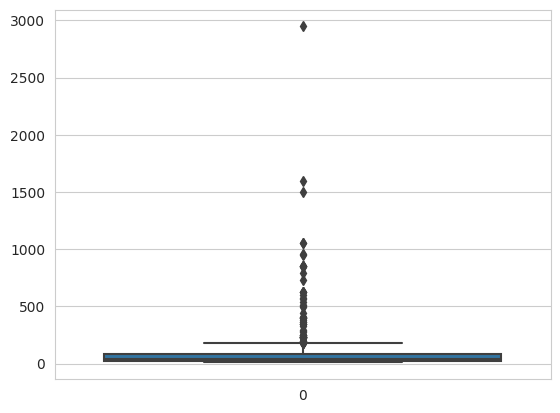

In [38]:
# Boxplot - Ainda há valores outliers
sns.boxplot(dados.Aspartate_Aminotransferase)

In [39]:
# Contagem de frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [40]:
# Manter somente os registros onde o valor for menor ou igual a 2500
dados = dados[dados.Aspartate_Aminotransferase <= 2500]
dados.shape

(568, 11)

In [41]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


### Tratamento de Valores Ausentes

In [42]:
# Verificando se há valor ausente
dados.isnull().values.any()

True

In [43]:
# Verifica quantas colunas tem valor ausente
dados.isnull().values.any().sum()

1

In [44]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [45]:
dados.shape

(568, 11)

In [46]:
# DECISÃO (deletar os registros): Drop dos registros com valores ausentes em qualquer coluna (any)
dados = dados.dropna(how = 'any')  

In [47]:
dados.shape

(564, 11)

In [48]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target


In [49]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.0,1
401,50,0,7.3,3.7,92,44,236,6.8,1.6,0.3,1
559,26,0,42.8,19.7,390,75,138,7.5,2.6,0.5,1
388,46,0,0.8,0.2,160,31,40,7.3,3.8,1.1,1
98,18,0,0.6,0.1,265,97,161,5.9,3.1,1.1,1


## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [50]:
# Devido a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, irei remover Direct_Bilirubin
# A decisão se baseia na quatidade de dados da variável: Total_Bilirubin. Dessa forma o modelo fica com dados mais
## genéricos.
dados = dados.drop('Direct_Bilirubin', 1)

In [51]:
dados.shape

(564, 10)

### Divisão em Treino e Teste

In [52]:
dados.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,195,27,59,7.3,2.4,0.40,1


In [53]:
# Cria um objeto separado para a variável target
y = dados.Target

In [54]:
# Cria um objeto separadado para as variáveis de entrada
X = dados.drop('Target', axis = 1) # OPeração somente na memóriao. Dataframe fica intacto.

In [55]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, # critério de divisão: 25%
                                                        random_state = 1234, # Processo aleatório com mesmo padrão
                                                        stratify = dados.Target)# Amostrgem estratificada

In [56]:
len(X_treino) # Quantidade de dados em treino

423

In [57]:
len(X_teste) # Quantidade de dados em teste

141

In [58]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(423, 9) (141, 9) (423,) (141,)


O RESULTADO ACIMA: (423, 9) (141, 9) (423,) (141,), linh e coluna . y só tem uma coluna

In [59]:
X_treino.head(2)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
205,45,0,2.5,163,28,22,7.6,4.0,1.1
390,72,0,0.8,148,23,35,6.0,3.0,1.0


### Balanceamento de Classe

In [60]:
# COLUNA QUE INDICA SE O PACIENTE TINHA OU NÃO A DOENÇA HEPÁTICA
y_treino.value_counts()

1    301
0    122
Name: Target, dtype: int64

ACIMA FICA EVIDENTE QUE OS DADOS ESTÃO DESBALANCEADOS. MAIS DADOS DA CLASSE 1. SE FICAR DESSA FORMA, EU ESTARIA REFORÇANDO A CLASSE 1. O ALGORITMO VAI APRENDER MAIS DE UM CLASSE DO QUE DA OUTRA.

SE DIMINUIR A CLASSE 1, HAVERÁ PERDA DE MUITOS DADOS.

<B>DECISÃO: UTILIZA A TECNICA: OVERSAMPLING. ISSO AUMENTARÁ A CLASSE MINORITÁRIA</B>

In [61]:
# Instalando o pacote
!pip install -q imblearn

In [62]:
# Carrega a função SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

# Função: smote, vai detectar o padrão da classe 1 e criar dados sitéticos para classe2, minoritária.

In [63]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Flávio Medeiros" --iversions

Author: Flávio Medeiros

joblib    : 1.2.0
numpy     : 1.23.4
seaborn   : 0.12.1
sklearn   : 0.0
imblearn  : 0.0
matplotlib: 3.6.0
pandas    : 1.5.1



In [64]:
# Aplicando a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

In [65]:
# Aplicando o oversampling (deve ser feito somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [66]:
len(X_res)

602

In [67]:
len(y_res)

602

In [68]:
# Dados balanceados - Com dados sintéticos
y_res.value_counts()

1    301
0    301
Name: Target, dtype: int64

In [69]:
# Renomeando o nome do dataset de treino para X
X_treino = X_res

In [70]:
# Renomeando o nome do dataset de treino para y
y_treino = y_res

### Padronização dos Dados - Geralmente a última etapa - Escolha padronização ou Normalização

Leia os manuais em pdf no Capítulo 9. ATENÇÃO:  NÃO APLICA NORMALIZAÇÃO/PADRONIZAÇÃO NA VARIÁVEL ALVO

In [71]:
# Fica claro que os dados não estão na mesma escala.
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [72]:
# Calculamos média e desvio padrão dos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

Age                            43.885382
Gender                          0.205980
Total_Bilirubin                 2.658962
Alkaline_Phosphotase          268.704319
Alamine_Aminotransferase       62.418605
Aspartate_Aminotransferase     77.436877
Total_Protiens                  6.531683
Albumin                         3.240212
Albumin_and_Globulin_Ratio      0.993351
dtype: float64
Age                            16.583329
Gender                          0.404752
Total_Bilirubin                 5.569849
Alkaline_Phosphotase          223.436291
Alamine_Aminotransferase      140.077293
Aspartate_Aminotransferase    144.267120
Total_Protiens                  1.016587
Albumin                         0.766983
Albumin_and_Globulin_Ratio      0.313319
dtype: float64


In [73]:
# Aplicando a Padronização
X_treino = (X_treino - treino_mean) / treino_std

In [74]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.067213,-0.508904,-0.028540,-0.473085,-0.245712,-0.384266,1.050886,0.990618,0.340383
1,1.695354,-0.508904,-0.333755,-0.540218,-0.281406,-0.294155,-0.523008,-0.313191,0.021220
2,-1.560928,-0.508904,-0.333755,0.059505,0.068401,0.433662,-1.014849,-0.965096,-0.617107
3,-0.113691,-0.508904,1.120504,0.014750,-0.224295,-0.113934,-0.719744,-1.617000,-1.574598
4,-0.113691,-0.508904,-0.333755,-0.634205,-0.238573,-0.328813,-1.605059,-0.704334,0.659547


In [75]:
# Describe
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,1.416364e-16,7.081821e-17,-3.540911e-17,-4.131062e-17,1.770455e-17,-1.180304e-17,-1.224565e-16,-4.013032e-16,-3.068789e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.405149e+00,-5.089040e-01,-4.055698e-01,-9.206397e-01,-3.742120e-01,-4.674445e-01,-3.769163e+00,-3.051191e+00,-2.212925e+00
25%,-7.167066e-01,-5.089040e-01,-3.429467e-01,-4.462315e-01,-2.885450e-01,-3.704023e-01,-6.213759e-01,-7.043339e-01,-6.171073e-01
50%,6.721316e-02,-5.089040e-01,-3.158007e-01,-3.164406e-01,-2.242948e-01,-2.872233e-01,6.720237e-02,-2.484711e-02,2.121974e-02
75%,7.908314e-01,-5.089040e-01,-1.542164e-01,5.950547e-02,-7.437754e-02,-7.927570e-02,6.574124e-01,8.435416e-01,5.957141e-01
max,2.780782e+00,1.961743e+00,1.298797e+01,8.240808e+00,1.154778e+01,1.055378e+01,3.018252e+00,2.946332e+00,5.766163e+00


TODA E QUALQUER TRANSFORMAÇÃO APLICADA EM TREINO TEM QUE SER APLICADA EM TESTE E NOVOS DADOS

In [76]:
# Decisão: Utilizar a média e desvio de treino para padronizar o conjunto de dados de teste
X_teste = (X_teste - treino_mean) / treino_std

In [77]:
# Describe - DADOS PADRONIZADOS
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.415199,-0.508904,-0.333755,-0.544694,-0.252850,-0.217907,-1.506691,-0.965096,0.021220
448,0.248118,1.961743,-0.333755,-0.567071,-0.259989,-0.363471,-0.523008,-0.834715,-0.936271
509,0.127515,-0.508904,3.113377,-0.065810,0.553847,3.206296,-1.113218,-0.313191,0.659547
415,1.574751,-0.508904,-0.243985,1.885529,0.218318,-0.259497,-2.883848,-0.704334,-0.936271
56,-0.656405,-0.508904,-0.333755,-0.316441,-0.259989,-0.377334,1.444359,0.990618,0.021220


###  Construção, Treinamento e Avaliação do Modelo 1 com Regressão Logística (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Para a primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark.

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

In [78]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [79]:
# Criando o modelo com GridSearch 
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [80]:
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [81]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=10)

In [82]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [83]:
# Mostra as 10 primeiras previsões
y_pred_v1[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [84]:
# Obtendo as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [85]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([[7.48210191e-01, 2.51789809e-01],
       [4.93410163e-01, 5.06589837e-01],
       [2.24408527e-05, 9.99977559e-01],
       [7.82050382e-01, 2.17949618e-01],
       [6.90099011e-01, 3.09900989e-01],
       [6.61030712e-01, 3.38969288e-01],
       [7.71054749e-01, 2.28945251e-01],
       [9.44272164e-02, 9.05572784e-01],
       [6.22007474e-01, 3.77992526e-01],
       [4.71726528e-03, 9.95282735e-01]])

In [86]:
# Obtendo as previsões no formato de probabilidade filtrando para a classe positiva
# Será necessário para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [87]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([0.25178981, 0.50658984, 0.99997756, 0.21794962, 0.30990099,
       0.33896929, 0.22894525, 0.90557278, 0.37799253, 0.99528273])

In [88]:
# Como exemplo, vamos verificar um dos pontos de dados (altere o valor de i se desejar)
i = 16 
print('Para o ponto de dado {}, classe real = {}, classe prevista = {}, probabilidade prevista = {}'.
      format(i, y_teste.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dado 16, classe real = 1, classe prevista = 1, probabilidade prevista = 0.8818552667370737


In [89]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

array([[32,  8],
       [41, 60]])

In [90]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [91]:
print(tn, fp, fn, tp)

32 8 41 60


In [92]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.6970297029702972


In [93]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [94]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7356435643564356


In [95]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6524822695035462


### Feature Importance

In [96]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C = 1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

In [97]:
# Obtendo os coeficientes pelo maior maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [98]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
Total_Bilirubin
Aspartate_Aminotransferase
Alamine_Aminotransferase
Albumin
Total_Protiens
Gender
Age
Alkaline_Phosphotase
Albumin_and_Globulin_Ratio


In [99]:
# Salva o modelo em disco
with open('modelos/modelo_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos/modelo_v1.pkl') 

In [100]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [101]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

In [102]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [103]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.69703,0.735644,0.652482


### Construção, Treinamento e Avaliação do Modelo 2 com Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

O desafio agora é tentar obter um modelo melhor que a versão 1. Vamos tentar o algoritmo Random Forest.

In [104]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [105]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [106]:
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [107]:
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=300)

In [108]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [109]:
# Obtém as previsões para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]

In [110]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v2)

array([[21, 19],
       [15, 86]])

In [111]:
# Curva ROC nos dados e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.6882425742574257


In [112]:
# Curva ROC nos dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [113]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.751980198019802


In [114]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.7588652482269503


### Feature Importance

In [115]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [116]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Alamine_Aminotransferase
Albumin_and_Globulin_Ratio
Total_Protiens
Age
Albumin
Gender


In [117]:
# Salva o modelo em disco
with open('modelos/modelo_v2.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2, 'modelos/modelo_v2.pkl') 

In [118]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}

In [119]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

In [120]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.697030,0.735644,0.652482
1,modelo_v2,Random Forest,0.688243,0.751980,0.758865


### Construção, Treinamento e Avaliação do Modelo 3 com KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Vamos tentar agora um algoritmo mais simples, o KNN. Para esse algoritmo precisamos antes definir o valor de K, que é o número de vizinhos mais próximos.

In [121]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))

In [122]:
# Lista para os scores
cv_scores = []

In [123]:
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())   

In [124]:
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]

In [125]:
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 1


In [126]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [127]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [128]:
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)

In [129]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v3)

array([[14, 26],
       [38, 63]])

In [130]:
# Previsão de probabilidade da classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:,1]

In [131]:
# Calcula ROC_AUC em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.48688118811881187


In [132]:
# Calcula curva ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)

In [133]:
# Calcula AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.48688118811881187


In [134]:
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.5460992907801419


Obs: Com o algoritmo KNN não extraímos as variáveis mais importantes, pois o conceito do algoritmo é diferente.

In [135]:
# Salva o modelo em disco
with open('modelos/modelo_v3.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v3, 'modelos/modelo_v3.pkl') 

In [136]:
# Dicionário com as métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}

In [137]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

In [138]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.697030,0.735644,0.652482
1,modelo_v2,Random Forest,0.688243,0.751980,0.758865
2,modelo_v3,KNN,0.486881,0.486881,0.546099


### Construção, Treinamento e Avaliação do Modelo 4 com Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Na versão 4 do modelo será utilizado um modelo de árvore de decisão.

In [139]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [140]:
# Cria o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [141]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [142]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=7)

In [143]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)

In [144]:
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]

In [145]:
# Confusion matrix
confusion_matrix(y_teste, y_pred_v4)

array([[24, 16],
       [36, 65]])

In [146]:
# Calcula ROC AUC score
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.6217821782178218


In [147]:
# Curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [148]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6563118811881189


In [149]:
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.6312056737588653


### Feature Importance

In [150]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
modelo_v4.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [151]:
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Age
Total_Protiens
Alamine_Aminotransferase
Gender
Albumin
Albumin_and_Globulin_Ratio


In [152]:
# Salva o modelo em disco
with open('modelos/modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'modelos/modelo_v4.pkl') 

In [153]:
# Dicionário com as métricas do modelo_v4
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}

In [154]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

In [155]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.697030,0.735644,0.652482
1,modelo_v2,Random Forest,0.688243,0.751980,0.758865
2,modelo_v3,KNN,0.486881,0.486881,0.546099
3,modelo_v4,Decision Tree,0.621782,0.656312,0.631206


### Construção, Treinamento e Avaliação do Modelo 5 com SVM

https://scikit-learn.org/stable/modules/svm.html

Para a quinta e última versão do modelo será utilizado o  SVM.

In [156]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

In [157]:
# Aplica a função
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [158]:
# Cria o modelo com os melhores hiperparâmetros
modelo_v5 = SVC(C = 1, gamma = 1, probability = True)

In [159]:
# Treinamento
modelo_v5.fit(X_treino, y_treino)

SVC(C=1, gamma=1, probability=True)

In [160]:
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)

In [161]:
confusion_matrix(y_teste, y_pred_v5)

array([[16, 24],
       [29, 72]])

In [162]:
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [163]:
# Calcula ROC AUC score
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.5564356435643565


In [164]:
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [165]:
# Calcula AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.5898514851485148


In [166]:
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.624113475177305


In [167]:
# Salva o modelo em disco
with open('modelos/modelo_v5.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v5, 'modelos/modelo_v5.pkl') 

In [168]:
# Dicionário com as métricas do modelo_v5
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}

In [169]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

In [170]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.697030,0.735644,0.652482
1,modelo_v2,Random Forest,0.688243,0.751980,0.758865
2,modelo_v3,KNN,0.486881,0.486881,0.546099
3,modelo_v4,Decision Tree,0.621782,0.656312,0.631206
4,modelo_v5,SVM,0.556436,0.589851,0.624113


### Seleção do Melhor Modelo

In [171]:
# DECISÃO: Utilizar o modelo que teve o maior AUC Score, por se tratar de uma métrica global
# O score AUC é o ideal para comparar modelos de diferentes algoritmos
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]

In [172]:
df_melhor_modelo

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
1,modelo_v2,Random Forest,0.688243,0.75198,0.758865


## Previsões com o Melhor Modelo Treinado

In [173]:
# Obtemos o nome do melhor modelo
modelo = df_melhor_modelo.Nome.to_string(index = False)
modelo

'modelo_v2'

In [174]:
# Carregamos o melhor modelo do disco
melhor_modelo = joblib.load('modelos/' + modelo + '.pkl')
melhor_modelo

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [175]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [176]:
# Dados brutos de um novo paciente
# O número de colunas deve ser o mesmo do que foi usado em treino
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [177]:
# Converte o objeto para array
arr_paciente = np.array(novo_paciente)

In [178]:
# Usamos média e desvio de treino para padronizar novos dados
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [179]:
# Converte o objeto para array
arr_paciente = np.array(arr_paciente)

In [180]:
# Dados do paciente padronizados (exatamente como o modelo espera receber os dados)
arr_paciente

array([ 1.69535427,  1.96174293, -0.33375453, -0.37014721, -0.33851743,
       -0.3357444 ,  0.55904403,  0.20833264, -0.07452931])

In [181]:
# Previsões de classe (por que a linha abaixo apresenta erro?)
#pred_novo_paciente = melhor_modelo.predict(arr_paciente)

In [182]:
# Previsões de classe
pred_novo_paciente = melhor_modelo.predict(arr_paciente.reshape(1, -1))

In [183]:
# Verifica o valor e imprime o resultado final
if pred_novo_paciente == 1:
    print('Este paciente deve apresentar doença hepática!')
else:
    print('Este paciente não deve apresentar doença hepática!')

Este paciente deve apresentar doença hepática!


# Fim